In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
"""
Portfolio Optimization Analysis
Using Modern Portfolio Theory to construct optimal portfolios
"""

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import yfinance as yf
import seaborn as sns

# PyPortfolioOpt specific imports
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

* Please note: Yahoo Finance updates data daily, so the values/visualizations you see when running this Colab may vary from what's in our report and slides.

In [ ]:
"""STEP 1: Data Collection"""

# 8 assets: AAPL, MSFT, NVDA, NEE, PG, JPM, AGG, TLT
# get closing price data from Yahoo Finance library
securities = ['aapl', 'msft', 'nvda', 'nee', 'pg', 'jpm', 'agg', 'tlt']

prices = yf.download(securities, start='2020-12-14', end='2025-12-14')['Close']

# Double check the dimensions of our output
print(f"Data loaded: {prices.shape[0]} days, {prices.shape[1]} assets")
print(f"Period: {prices.index[0]} to {prices.index[-1]}")
prices.head()

/tmp/ipython-input-1772943596.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(securities, start='2020-12-14', end='2025-12-14')['Close']
[*********************100%***********************]  8 of 8 completed

Data loaded: 1256 days, 8 assets
Period: 2020-12-14 00:00:00 to 2025-12-12 00:00:00


Ticker,AAPL,AGG,JPM,MSFT,NEE,NVDA,PG,TLT
Date,,,,,,,,
2020-12-14,118.547035,101.916824,103.899818,205.533386,64.722191,13.271429,119.875183,135.774490
2020-12-15,124.485069,101.977303,105.673920,205.466263,65.918976,13.323032,120.581093,135.320099
2020-12-16,124.416931,101.934082,105.981308,210.407867,65.505394,13.205365,121.128204,134.959854
2020-12-17,125.283310,101.929779,105.103035,210.542191,66.050972,13.303837,121.992943,134.602783
2020-12-18,123.297478,101.877892,104.584854,209.745819,65.566986,13.234779,122.690041,134.199265


In [ ]:
# Calculate daily returns (as % change in price), drop any potential NaN values
returns = prices.pct_change().dropna()

print(f"Returns: {returns.shape[0]} days")
returns.head()

Returns: 1255 days


Ticker,AAPL,AGG,JPM,MSFT,NEE,NVDA,PG,TLT
Date,,,,,,,,
2020-12-15,0.050090,0.000593,0.017075,-0.000327,0.018491,0.003888,0.005889,-0.003347
2020-12-16,-0.000547,-0.000424,0.002909,0.024051,-0.006274,-0.008832,0.004537,-0.002662
2020-12-17,0.006964,-0.000042,-0.008287,0.000638,0.008329,0.007457,0.007139,-0.002646
2020-12-18,-0.015851,-0.000509,-0.004930,-0.003782,-0.007327,-0.005191,0.005714,-0.002998
2020-12-21,0.012395,0.000000,0.037538,0.018299,-0.001476,0.004540,-0.010932,0.003966


In [ ]:
"""STEP 2: Calculate Expected Returns and Covariance"""

# use PyPortOpt methods
exp_ret = mean_historical_return(prices) # gets the average return
cov_mat = CovarianceShrinkage(prices).ledoit_wolf() # shrink covariances to reduce noise (improves the quality of our predicted allocations)

print("Expected Annual Returns:")
print(exp_ret)

Expected Annual Returns:
Ticker
AAPL    0.186898
AGG    -0.004186
JPM     0.252253
MSFT    0.184944
NEE     0.047758
NVDA    0.678520
PG      0.035821
TLT    -0.084778
dtype: float64


In [ ]:
"""STEP 3: Minimum Variance Portfolio"""

# Minimize risk regardless of return
ef_mv = EfficientFrontier(exp_ret, cov_mat) # EfficientFrontier calculates Markowitz optimality conditions based on expected returns and covariances
mvp_weights = ef_mv.min_volatility() # creates an efficient allocation that minimizes volatility

print("MINIMUM VARIANCE PORTFOLIO:")
print(mvp_weights)

MINIMUM VARIANCE PORTFOLIO:
OrderedDict({'AAPL': 0.0, 'AGG': 0.8690568673562135, 'JPM': 0.0682247187087731, 'MSFT': 0.0014980430304824, 'NEE': 0.0, 'NVDA': 0.0, 'PG': 0.0612203709045311, 'TLT': 0.0})


In [ ]:
# Get performance metrics
perf_mv = ef_mv.portfolio_performance(verbose=True)

Expected annual return: 1.6%
Annual volatility: 6.3%
Sharpe Ratio: 0.25


In [ ]:
"""STEP 3: Maximum Sharpe Ratio Portfolio"""

# Maximize risk-adjusted returns
ef_sharpe = EfficientFrontier(exp_ret, cov_mat)
sharpe_weights = ef_sharpe.max_sharpe(risk_free_rate=0.04)

print("MAXIMUM SHARPE RATIO PORTFOLIO:")
print(sharpe_weights)

MAXIMUM SHARPE RATIO PORTFOLIO:
OrderedDict({'AAPL': 0.0, 'AGG': 0.0, 'JPM': 0.5203401944188005, 'MSFT': 0.0, 'NEE': 0.0, 'NVDA': 0.4796598055811995, 'PG': 0.0, 'TLT': 0.0})


In [ ]:
# Get performance metrics
perf_sharpe = ef_sharpe.portfolio_performance(verbose=True, risk_free_rate=0.04)

Expected annual return: 45.7%
Annual volatility: 31.2%
Sharpe Ratio: 1.33


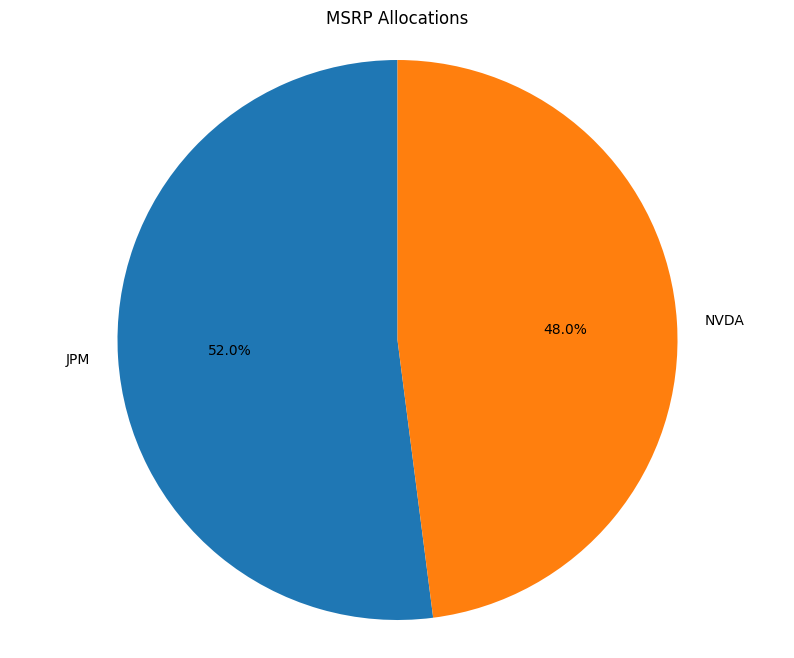

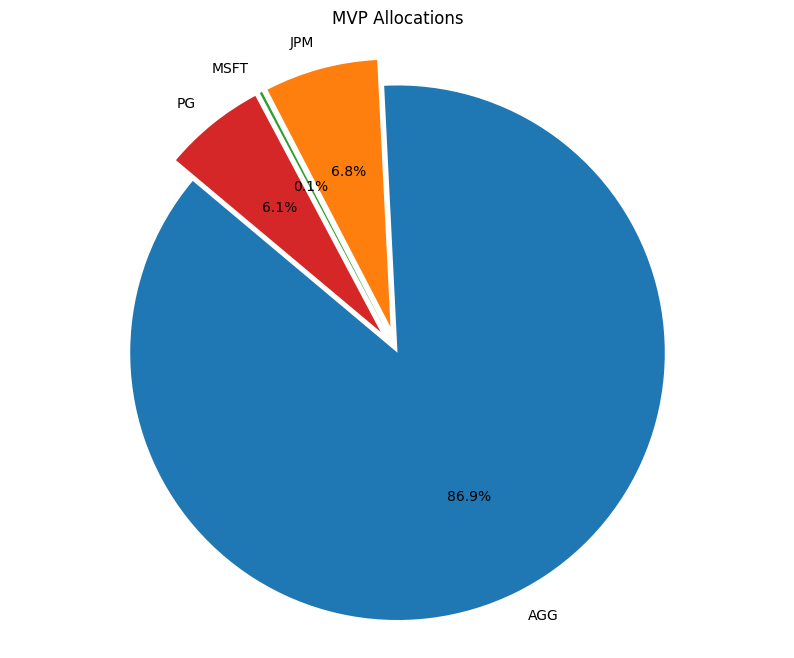

In [ ]:
"""STEP 4: Visualize Allocations"""

# 1. Filter zeros
# (Our weights are dictionary objects, so we iterated through each item to get rid of 0% values)
mvp_filt = {k: v for k, v in mvp_weights.items() if v > 0.001}
sharpe_filt = {k: v for k, v in sharpe_weights.items() if v > 0.001}

# 2. Create pie charts
# Max Sharpe
plt.figure(figsize=(10, 8))
plt.pie(list(sharpe_filt.values()), labels=list(sharpe_filt.keys()),
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('MSRP Allocations')
plt.show()

# Min Variance
explode = [0.1 if x < 0.1 else 0 for x in mvp_filt.values()]
plt.figure(figsize=(10, 8))
plt.pie(list(mvp_filt.values()), labels=list(mvp_filt.keys()),
        autopct='%1.1f%%', explode=explode, shadow=False, startangle=140)
plt.axis('equal')
plt.title('MVP Allocations')
plt.show()

MSRP: The most abundant stocks in this portfolio are JPM and NVDA. This allocation makes sense because they have the highest expected annual returns out of the selected securities (0.25 and 0.68 respectively), making them appealing to investors interested in maximizing their portfolio's return.

MVP: The strong majority of this portfolio is a bond (AGG, 86.9%) with limited amounts of stock from the healthcare and banking sector. Bonds are likely more prevalent in a portfolio seeking to minimize volatility as their prices remain stable during periods of volatility. JPM has ties to the performance of the overall economy, making it generally more predictable.

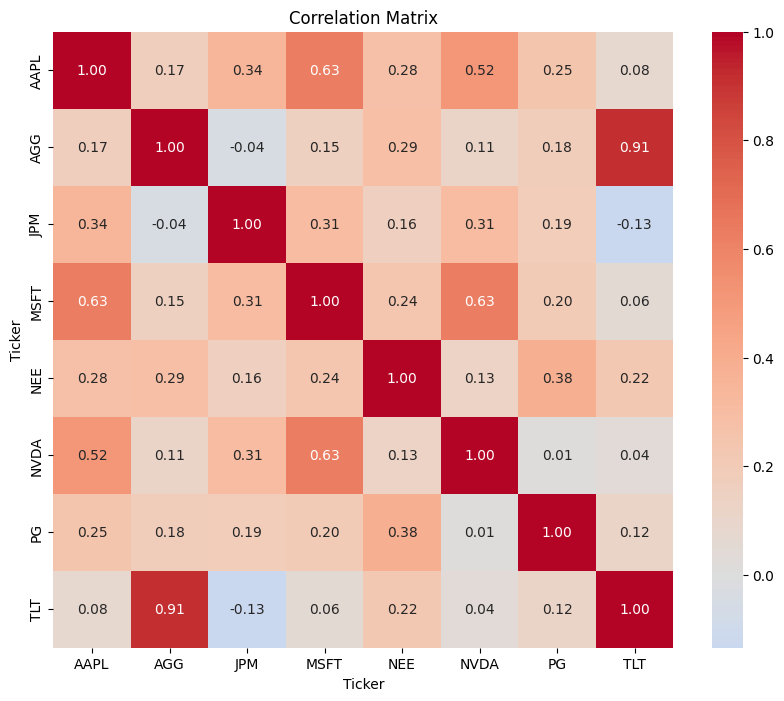

In [ ]:
"""STEP 5: Correlation Analysis"""

# create a correlation matrix of returns
corr = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

The most notable correlation is between the two bonds, AGG and TLT. The strength of this association is likely due to the fact that both are priced based on interest rates, allowing their prices to move together.

There appears to be moderate correlation (0.5-0.65) amongst the tech stocks: AAPL, NVDA, and MSFT. It is possible that this is due to the fact that they are  dominant firms in the same industry.

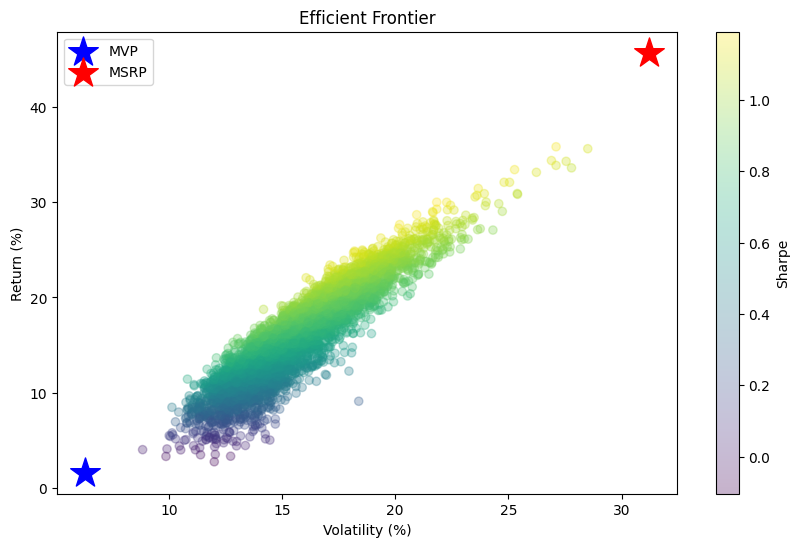

In [ ]:
"""STEP 6: Efficient Frontier"""

# graph efficient frontier curve
results = np.zeros((3, 5000))
for i in range(5000):
    w = np.random.random(8)
    w /= w.sum()
    ret = (w * exp_ret).sum()
    vol = np.sqrt(w @ cov_mat @ w)
    results[0,i] = vol * 100
    results[1,i] = ret * 100
    results[2,i] = (ret - 0.04) / vol

plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', alpha=0.3)
plt.colorbar(label='Sharpe')
plt.scatter(6.3, 1.6, marker='*', s=500, c='blue', label='MVP')
plt.scatter(31.2, 45.7, marker='*', s=500, c='red', label='MSRP')
plt.xlabel('Volatility (%)')
plt.ylabel('Return (%)')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

Our efficient frontier shows again that the MVP does indeed have low volatility, but at the expense of having a very low return in comparison to that of the MSRP. Indeed, the MSRP has a much higher risk to compensate for higher potential volatility.

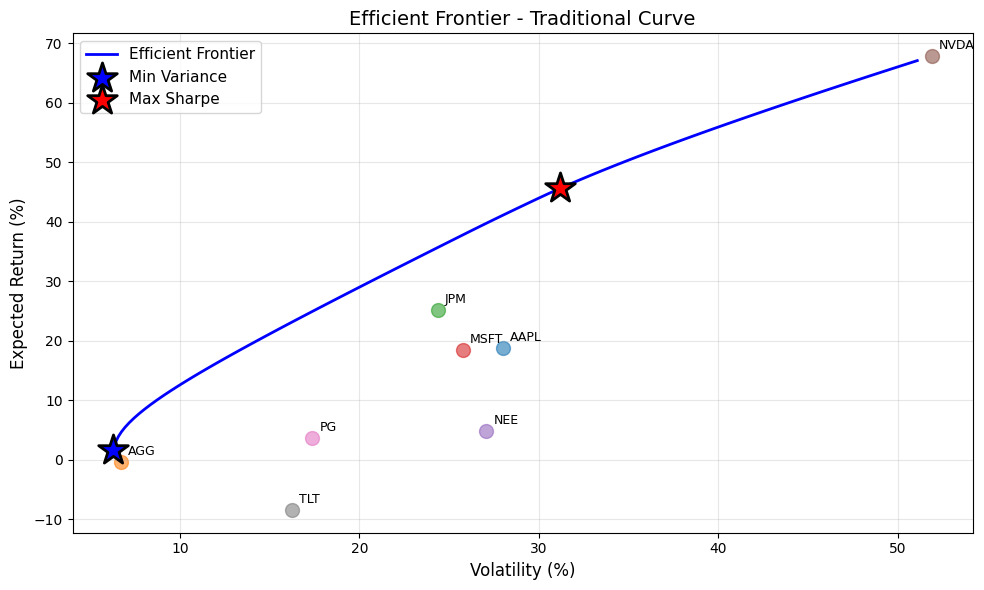

✓ Traditional efficient frontier curve plotted!


In [ ]:
"""STEP 6 (ALTERNATIVE): Traditional Efficient Frontier Curve"""

import numpy as np
import matplotlib.pyplot as plt

# Generate portfolios along the efficient frontier
# We'll create portfolios with target returns from min to max
min_ret = exp_ret.min()
max_ret = exp_ret.max()
target_returns = np.linspace(min_ret, max_ret, 100)  # 100 points along frontier

frontier_volatilities = []
frontier_returns = []

from pypfopt.efficient_frontier import EfficientFrontier

for target in target_returns:
    try:
        # Create new instance of efficient frontier for each target
        ef_temp = EfficientFrontier(exp_ret, cov_mat)

        # Find portfolio with this target return
        weights = ef_temp.efficient_return(target)

        # Get the volatility for this portfolio
        ret, vol, _ = ef_temp.portfolio_performance()

        frontier_returns.append(ret * 100)
        frontier_volatilities.append(vol * 100)
    except:
        # Skip if no feasible portfolio at this return level
        continue

# Plot the efficient frontier curve
plt.figure(figsize=(10, 6))

# Plot the frontier as a line
plt.plot(frontier_volatilities, frontier_returns, 'b-', linewidth=2, label='Efficient Frontier')

# Highlight our two portfolios
plt.scatter(6.3, 1.6, marker='*', s=500, c='blue', edgecolors='black',
           linewidth=2, label='Min Variance', zorder=5)
plt.scatter(31.2, 45.7, marker='*', s=500, c='red', edgecolors='black',
           linewidth=2, label='Max Sharpe', zorder=5)

# Plot individual assets as dots
for asset in exp_ret.index:
    asset_return = exp_ret[asset] * 100
    asset_vol = np.sqrt(cov_mat.loc[asset, asset]) * 100
    plt.scatter(asset_vol, asset_return, s=100, alpha=0.6)
    plt.annotate(asset, (asset_vol, asset_return), fontsize=9,
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Volatility (%)', fontsize=12)
plt.ylabel('Expected Return (%)', fontsize=12)
plt.title('Efficient Frontier - Traditional Curve', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# EXPLANATION OF WHAT THIS DOES:
# Instead of random portfolios (dots), this creates a smooth curve showing
# the OPTIMAL portfolio for each possible return level.
# - The blue line = all possible efficient portfolios
# - Below the line = suboptimal (could get same return with less risk)
# - Above the line = impossible (can't get that return at that risk level)
# - The two portfolios (stars) sit exactly ON the line


The efficient frontier appears to be heavily determined by NVDA and AGG, with NVDA accounting for the upper bound of volatility and expected return and AGG setting the threshold for safest performance.   

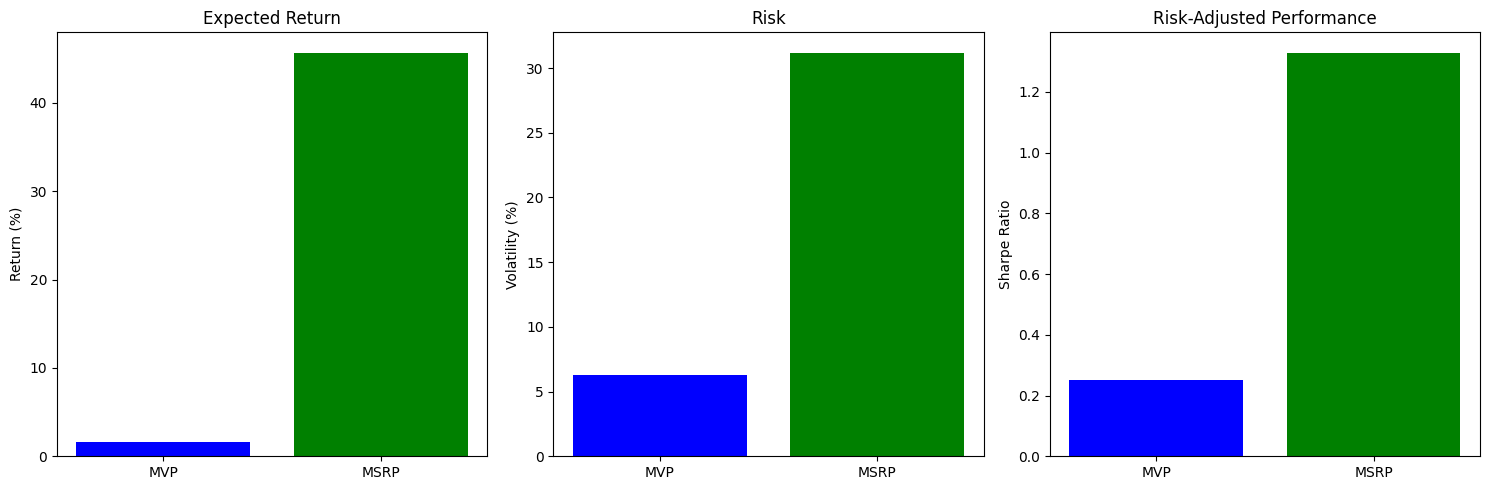

In [ ]:
"""STEP 7: Comparison"""

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.bar(['MVP', 'MSRP'], [1.6, 45.7], color=['blue', 'green'])
ax1.set_ylabel('Return (%)')
ax1.set_title('Expected Return')

ax2.bar(['MVP', 'MSRP'], [6.3, 31.2], color=['blue', 'green'])
ax2.set_ylabel('Volatility (%)')
ax2.set_title('Risk')

ax3.bar(['MVP', 'MSRP'], [0.25, 1.33], color=['blue', 'green'])
ax3.set_ylabel('Sharpe Ratio')
ax3.set_title('Risk-Adjusted Performance')

plt.tight_layout()
plt.show()

The code below was for graphing output from the HuggingFace LLM model.

In [ ]:
growth = {'NVDA': 25, 'AAPL': 15, 'MSFT': 15, 'JPM': 15, 'NEE': 10, 'PG': 10, 'AGG': 5, 'TLT': 5}
safe = {'MSFT': 1, 'JPM': 2, 'NEE': 5, 'PG': 12, 'AGG': 55, 'TLT': 25}

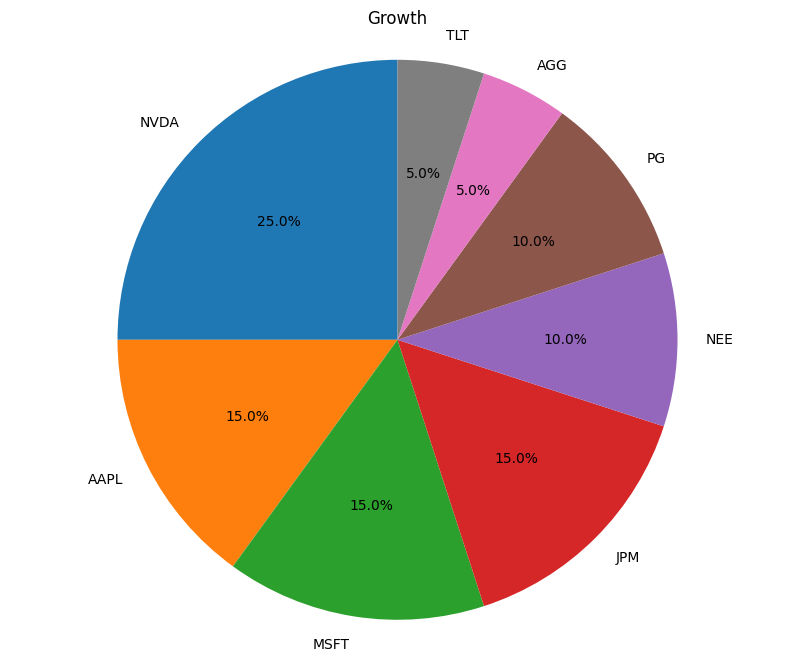

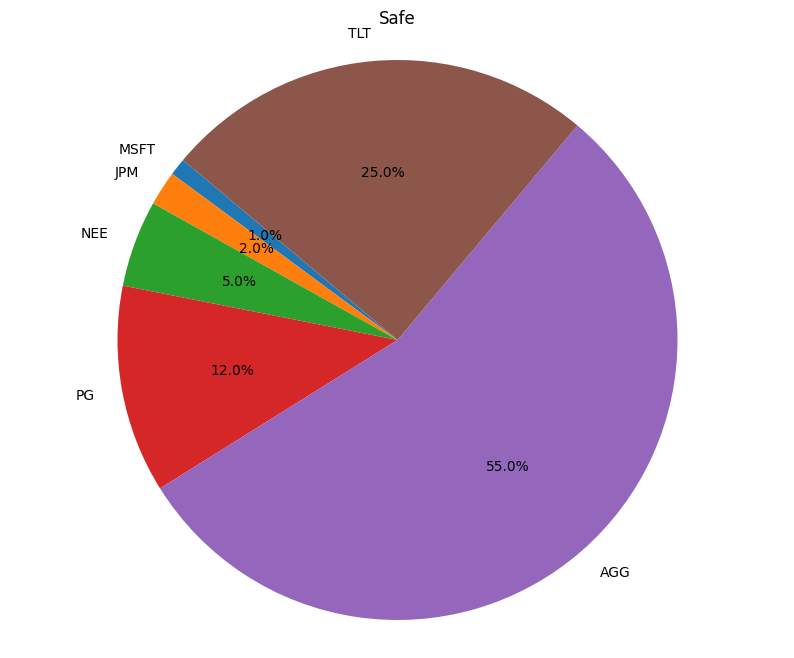

In [ ]:
# Growth Stocks
plt.figure(figsize=(10, 8))
plt.pie(list(growth.values()), labels=list(growth.keys()),
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Growth')
plt.show()

# Safe Stocks
plt.figure(figsize=(10, 8))
plt.pie(list(safe.values()), labels=list(safe.keys()),
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Safe')
plt.show()